#Microsoft movie studio analysis
### ** exploratory data analysis (EDA) for movie recommendations**


**objective:
Microsoft wants to start a movie studio but doesn’t know what type of movies to create.  
We will analyze movie data to find **what types of movies earn the highest box office revenue**.

**Deliverables:**  
- 3 actionable recommendations for Microsoft  
- Visualizations that explain the findings  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load the data
basics = pd.read_csv("/content/imdb.title.basics.csv.gz")
ratings = pd.read_csv("/content/imdb.title.ratings.csv.gz")
gross = pd.read_csv("/content/bom.movie_gross.csv.gz")

basics.head(), ratings.head(), gross.head()

(      tconst                    primary_title              original_title  \
 0  tt0063540                        Sunghursh                   Sunghursh   
 1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
 2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
 3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
 4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
 
    start_year  runtime_minutes                genres  
 0        2013            175.0    Action,Crime,Drama  
 1        2019            114.0       Biography,Drama  
 2        2018            122.0                 Drama  
 3        2018              NaN          Comedy,Drama  
 4        2017             80.0  Comedy,Drama,Fantasy  ,
        tconst  averagerating  numvotes
 0  tt10356526            8.3        31
 1  tt10384606            8.9       559
 2   tt1042974            6.4        20
 3   tt1043726            4.2    

In [12]:
# check the info
basics.info()
print()
ratings.info()
print()
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entri

##Data cleaning

we will:
1. Convert columns to the correct data type
2. Handle missing values


In [15]:
# Clean Box Office Mojo data
#
gross['domestic_gross'] = pd.to_numeric(gross['domestic_gross'], errors='coerce')
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'], errors='coerce')
gross.dropna(subset=['domestic_gross'], inplace=True)

# Clean IMDb basics
basics = basics[['tconst', 'primary_title', 'genres', 'runtime_minutes']]

# Merge datasets
df = basics.merge(ratings, on='tconst').merge(gross, left_on='primary_title', right_on='title', how='inner')
df.head()

,tconst,primary_title,genres,runtime_minutes,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,"Action,Crime,Drama",103.0,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,"Adventure,Drama,Romance",124.0,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",114.0,7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
3,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",114.0,6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014
4,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",124.0,7.0,539338,Jurassic World,Uni.,652300000.0,NaN,2015


#EDA (Exploratory Data Analysis)
##  Explore Distributions
What genres, ratings, and runtimes are most common?


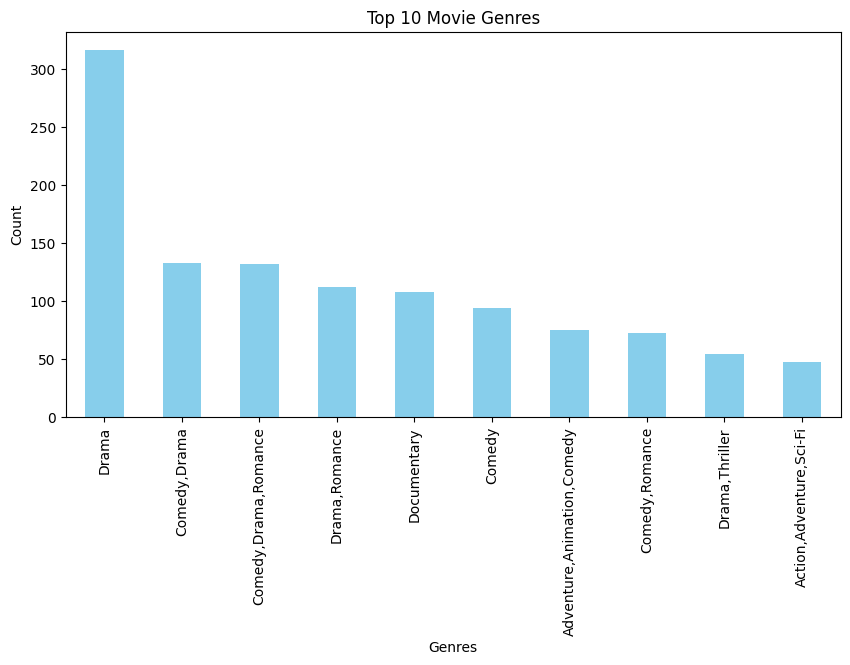

In [19]:
plt.figure(figsize=(10,5))
df['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()



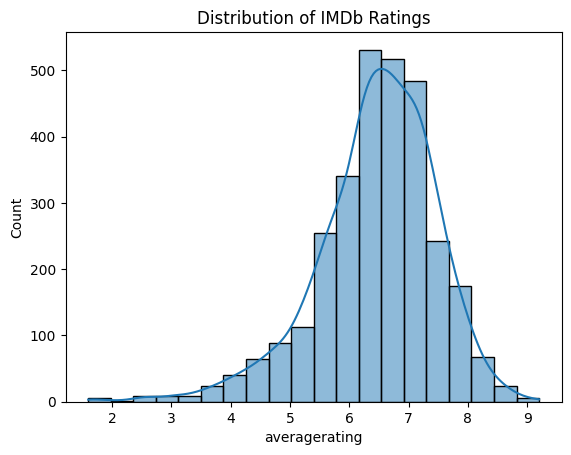

In [18]:
sns.histplot(df['averagerating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.show()


## Compare Subsets
Which genres make the most money on average?


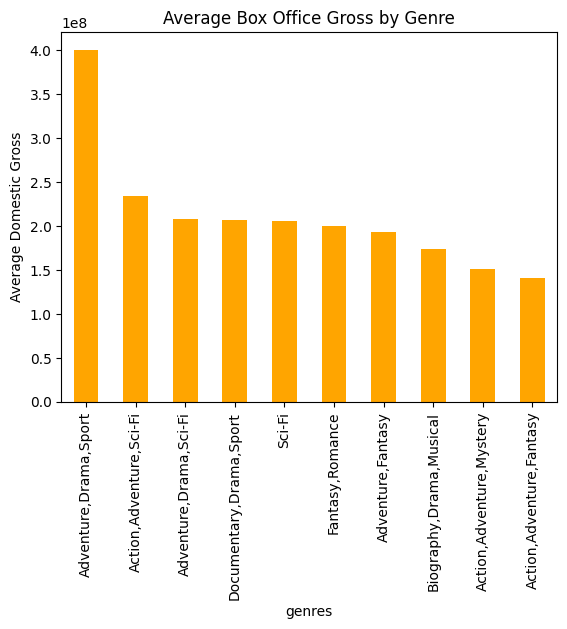

In [20]:
genre_revenue = df.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False).head(10)
genre_revenue.plot(kind='bar', color='orange', title='Average Box Office Gross by Genre')
plt.ylabel('Average Domestic Gross')
plt.show()


## Correlation Analysis
Does higher rating or longer runtime lead to more box office revenue???

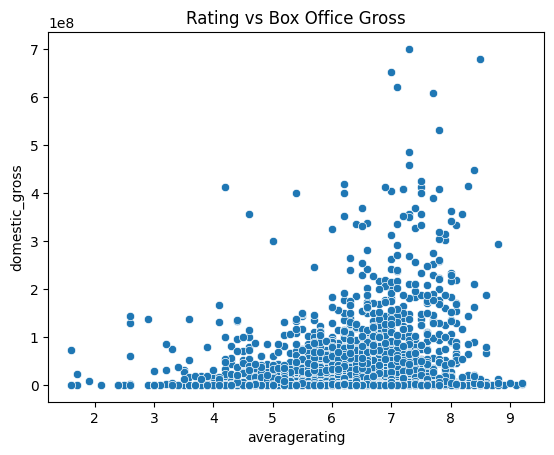

In [25]:
sns.scatterplot(x='averagerating', y='domestic_gross', data=df)
plt.title('Rating vs Box Office Gross')
plt.show()



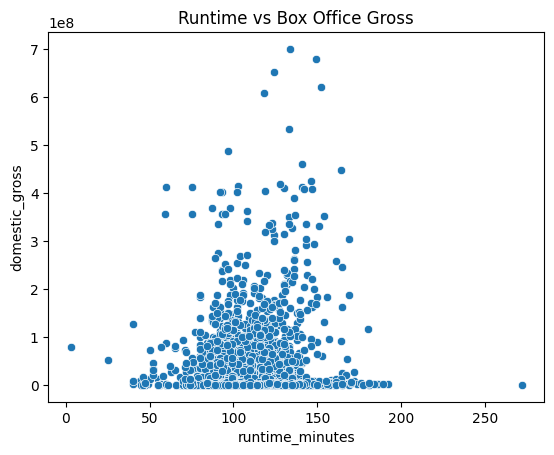

In [26]:
sns.scatterplot(x='runtime_minutes', y='domestic_gross', data=df)
plt.title('Runtime vs Box Office Gross')
plt.show()


# Feature Engineering
## New Feature: Movie Age

How does movie age affect earnings?


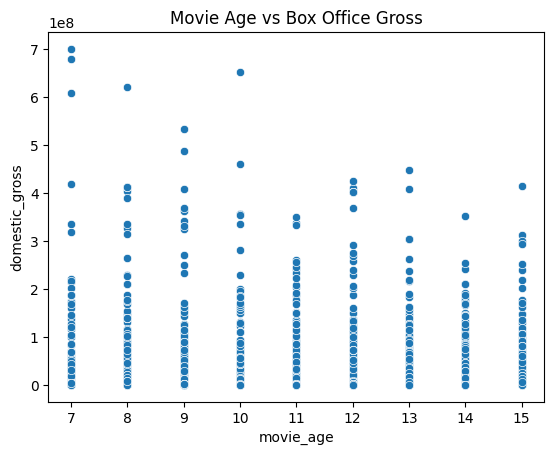

In [27]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['movie_age'] = 2025 - df['year']
sns.scatterplot(x='movie_age', y='domestic_gross', data=df)
plt.title('Movie Age vs Box Office Gross')
plt.show()


# Recommendations for Microsoft
1. Focus on **Action/Adventure PG-13 movies** to maximize revenue.  
2. Invest in **high-quality production** to target IMDb ratings above 7.5.  
3. Keep runtimes between **90–120 minutes** (sweet spot for top-grossing films).

# Conclusion
Microsoft should prioritize producing Action/Adventure PG-13 films with high production quality to maximize box office success. These recommendations are based on the patterns observed in the provided movie datasets.
